# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-16 18:00:03.785110


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/15/20


,9/15/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,6593269,195786,2.97
Brazil,4382263,133119,3.04
India,5020359,82066,1.63
Mexico,676487,71678,10.60
United Kingdom,376670,41753,11.08
Italy,289990,35633,12.29
France,433905,31007,7.15


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/15/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
41171,US,6520122,2020-09-13,194071.0,378.0,34999.0,34822.428571
41170,US,6485123,2020-09-12,193693.0,714.0,41471.0,34307.571429
41169,US,6443652,2020-09-11,192979.0,1213.0,47552.0,34733.428571
41168,US,6396100,2020-09-10,191766.0,907.0,35888.0,35154.857143
41167,US,6360212,2020-09-09,190859.0,1206.0,33203.0,35243.142857
41166,US,6327009,2020-09-08,189653.0,445.0,26387.0,36167.000000
41165,US,6300622,2020-09-07,189208.0,267.0,24257.0,38576.428571


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/15/20


,9/15/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,445714,33038.0,7.41
New Jersey,197404,16043.0,8.13
California,768204,14594.0,1.90
Texas,692753,14593.0,2.11
Florida,668846,12787.0,1.91
Massachusetts,125393,9225.0,7.36
Illinois,266295,8564.0,3.22


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/15/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1425,California,761728,2020-09-13,14378.0,51.0,2795.0,3267.428571
1424,California,758933,2020-09-12,14327.0,97.0,4028.0,3374.142857
1423,California,754905,2020-09-11,14230.0,153.0,3944.0,3463.285714
1422,California,750961,2020-09-10,14077.0,94.0,3671.0,3563.285714
1421,California,747290,2020-09-09,13983.0,160.0,2946.0,3715.571429
1420,California,744344,2020-09-08,13823.0,65.0,3379.0,4103.857143
1419,California,740965,2020-09-07,13758.0,27.0,2109.0,4070.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/15/20


,9/15/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,255049,6273.0,2.46
Riverside,55986,1125.0,2.01
Orange,51124,1105.0,2.16
San Bernardino,50978,835.0,1.64
San Diego,43181,742.0,1.72
San Joaquin,19564,392.0,2.00
Sacramento,20545,358.0,1.74


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/15/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4519,Los Angeles,253985,2020-09-13,6208.0,11.0,809.0,807.285714
4518,Los Angeles,253176,2020-09-12,6197.0,26.0,1110.0,804.857143
4517,Los Angeles,252066,2020-09-11,6171.0,43.0,1042.0,808.428571
4516,Los Angeles,251024,2020-09-10,6128.0,38.0,1165.0,860.714286
4515,Los Angeles,249859,2020-09-09,6090.0,54.0,618.0,846.285714
4514,Los Angeles,249241,2020-09-08,6036.0,6.0,420.0,960.000000
4513,Los Angeles,248821,2020-09-07,6030.0,25.0,487.0,1007.571429
4512,Los Angeles,248334,2020-09-06,6005.0,5.0,792.0,1083.571429
4511,Los Angeles,247542,2020-09-05,6000.0,23.0,1135.0,1112.285714
4510,Los Angeles,246407,2020-09-04,5977.0,45.0,1408.0,1135.571429



7 day new US cases as of 9/15/20


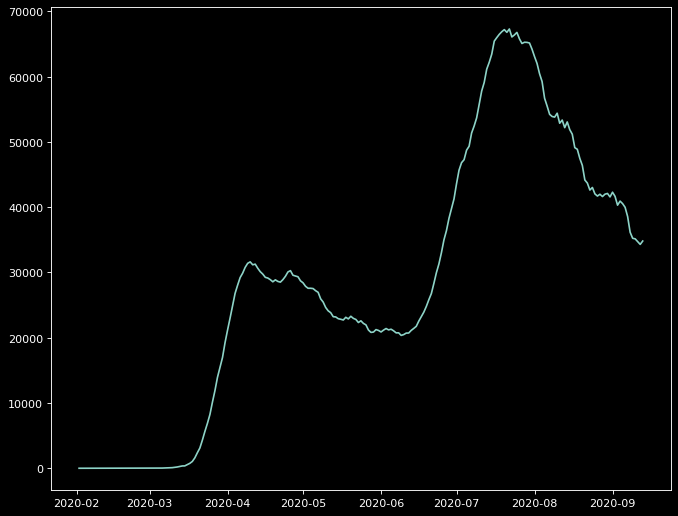

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/15/20


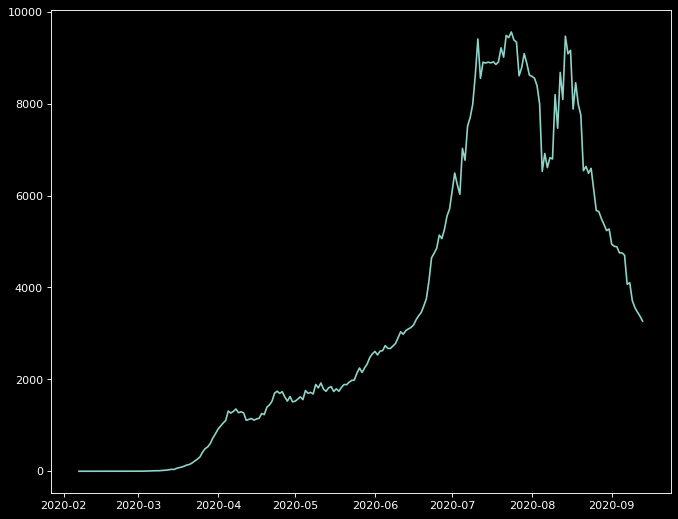

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/15/20


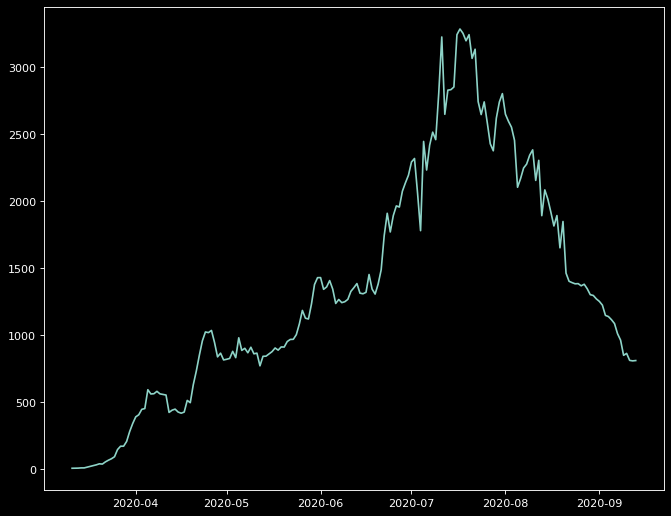

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()